# Chapter 3: Exercise 11

**Import packages**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from ISLP.models import (ModelSpec as MS, summarize)

**Generate predictor x and response y**

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

### (a) Simple linear regression of y onto x without an intercept

**Fit the model**

In [3]:
summarize(sm.OLS(y, x).fit())

,coef,std err,t,P>|t|
x1,1.9762,0.117,16.898,0.0


Note we get the same fit above and below, but the below method will simplify things when we introduce an intercept later on.

In [4]:
design = MS([0],intercept=False)

In [5]:
X = design.fit_transform(df_x)

In [6]:
model = sm.OLS(y, X)
results = model.fit()

In [7]:
summarize(results)

,coef,std err,t,P>|t|
X0,1.9762,0.117,16.898,0.0


- **Coefficient estimate $\hat{\beta}$:** 1.9762
- **Standard Error of coefficient estimate:** 0.117
- **t-statistic:** 16.898
- **p-value (for $H_0: \beta = 0$):** 0.0

The slope of the linear regression equation is 1.9762. With p-value small we conclude there is strong evidence x is useful for predicting y, and the true slope ($\beta$) is indeed non-zero.

**Scatter plot with line of best fit**

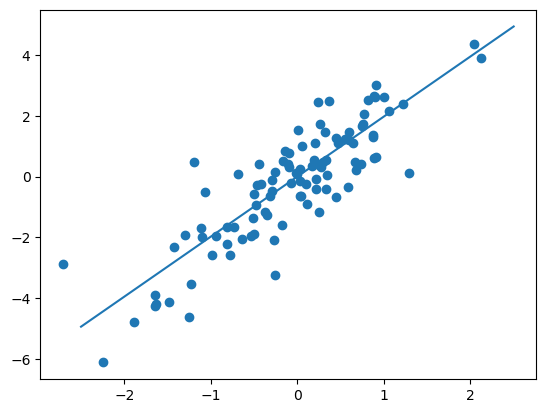

In [8]:
plt.scatter(x,y)
plt.plot([-2.5,2.5],[-2.5*results.params[0], 2.5*results.params[0]])
plt.show()

### (b) Simple linear regression of x onto y without an intercept

In [9]:
Y = design.fit_transform(df_y)

In [10]:
model = sm.OLS(x, Y)
results1 = model.fit()

In [11]:
summarize(results1)

,coef,std err,t,P>|t|
X0,0.3757,0.022,16.898,0.0


- **Coefficient estimate $\hat{\beta}$:** 0.3757
- **Standard Error of coefficient estimate:** 0.022
- **t-statistic:** 16.898
- **p-value (for $H_0: \beta = 0$):** 0.0

The slope of the linear regression equation is 0.3757. With p-value small we conclude there is strong evidence y is useful for predicting x, and the true slope ($\beta$) is indeed non-zero.

### (c) Relationship between ordinary least squares fit for y onto x and x onto y

We observe the t-statistic is identical in cases (a) and (b)

### (d) Proof of t-statistic formula and computational verification in the case of no intercept

**Algebraic proof**

Proof coming soon...written on paper but not yet typed....

**Comfirm numerically**

In [12]:
(np.sqrt(len(x)-1) * np.sum(x*y)) \
/ np.sqrt(np.sum(x**2) * np.sum(y**2) - np.sum(x*y)**2)

16.898417063035094

Indeed, this confirms numerically our formula for the t-statistic.

In [13]:
results.tvalues

X0    16.898417
dtype: float64